## Data Dictionary

* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm

## Loading Libraries

In [99]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with re
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To save the models
import pickle

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Understanding

In [42]:
data = pd.read_csv('Crop_recommendation.csv')

In [43]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [44]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [45]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [46]:
#understanding the shape of the data
df.shape

(2200, 8)

* The dataset has 2200 rows and 8 columns

In [47]:
#Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


* There are no null or missing values in the data and all the columns seem to be in the appropriate data type

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


* The min and max values will have to be looked at because soil having no nitrogen at all is strange
* The statistics of the other features seem normal

In [49]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

* confirming there are no missing values

In [50]:
# Taking a look at the label column
df['label'].head(10)

0    rice
1    rice
2    rice
3    rice
4    rice
5    rice
6    rice
7    rice
8    rice
9    rice
Name: label, dtype: object

In [51]:
df['label'].nunique()

22

In [52]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [53]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Checking for outliers

In [54]:
# To find the 25th percentile and 75th percentile
Q1 = df.quantile(0.25)  
Q3 = df.quantile(0.75)

# Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1 

lower = (Q1 - 1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [55]:
(
    (df.select_dtypes(include=["float64", "int64"]) < lower)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

N              0.000000
P              6.272727
K              9.090909
temperature    3.909091
humidity       1.363636
ph             2.590909
rainfall       4.545455
dtype: float64

* All the columns have outliers excepth the Nitrogen column

## Exploratory Data Analysis For Insights

## Univariate Analysis

In [56]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [57]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [58]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Nitrogen

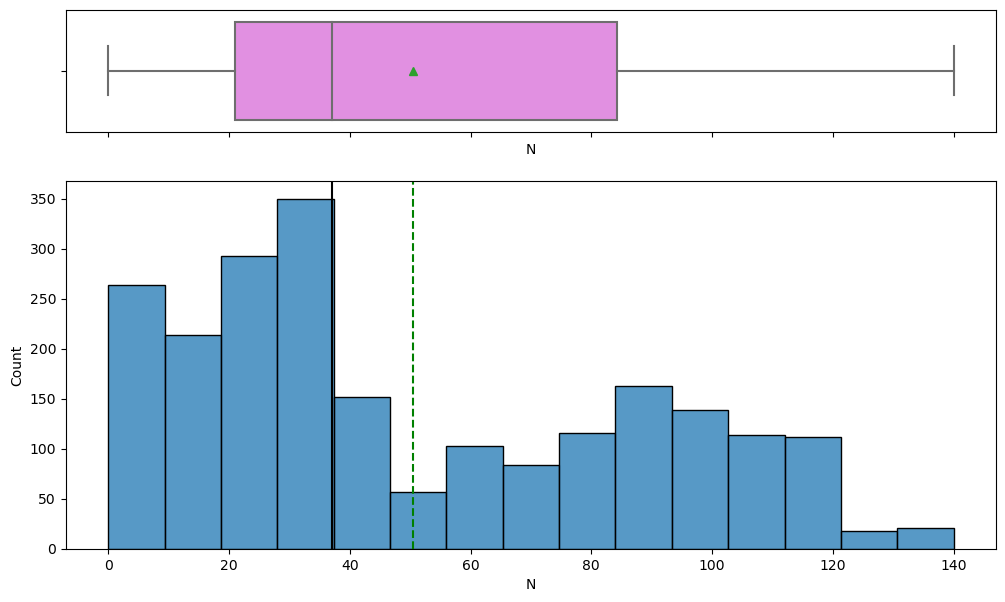

In [59]:
histogram_boxplot(df, "N")

## Phosphorus

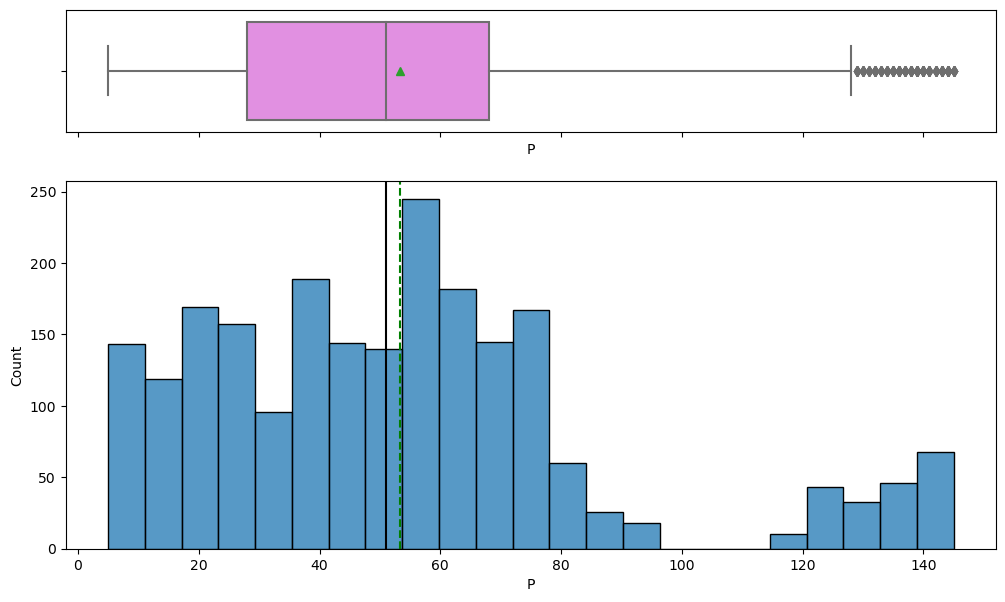

In [60]:
histogram_boxplot(df, "P")

### Potassium

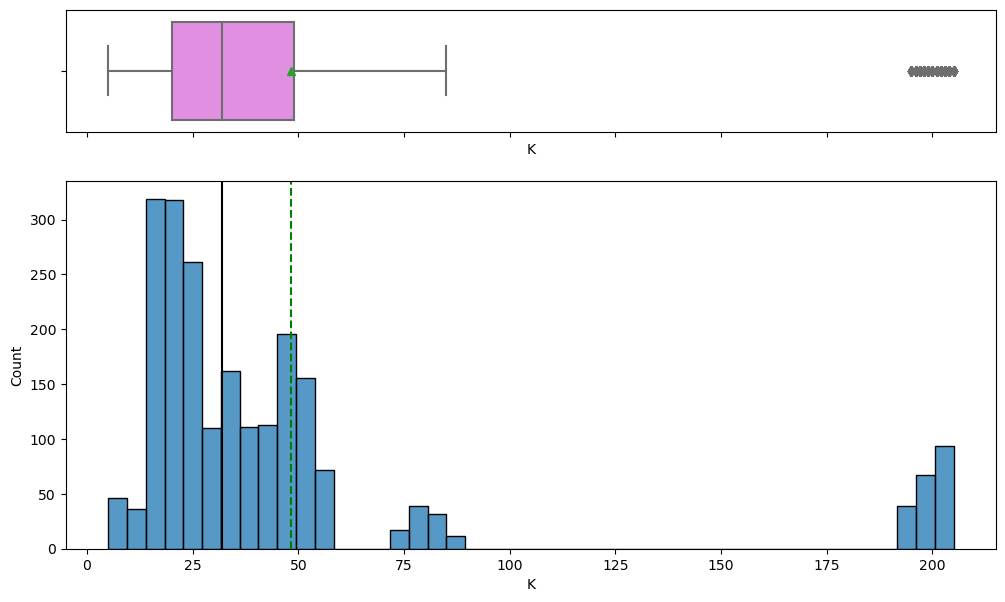

In [61]:
histogram_boxplot(df, "K")

* Potassium hassome outliers

### Temperature

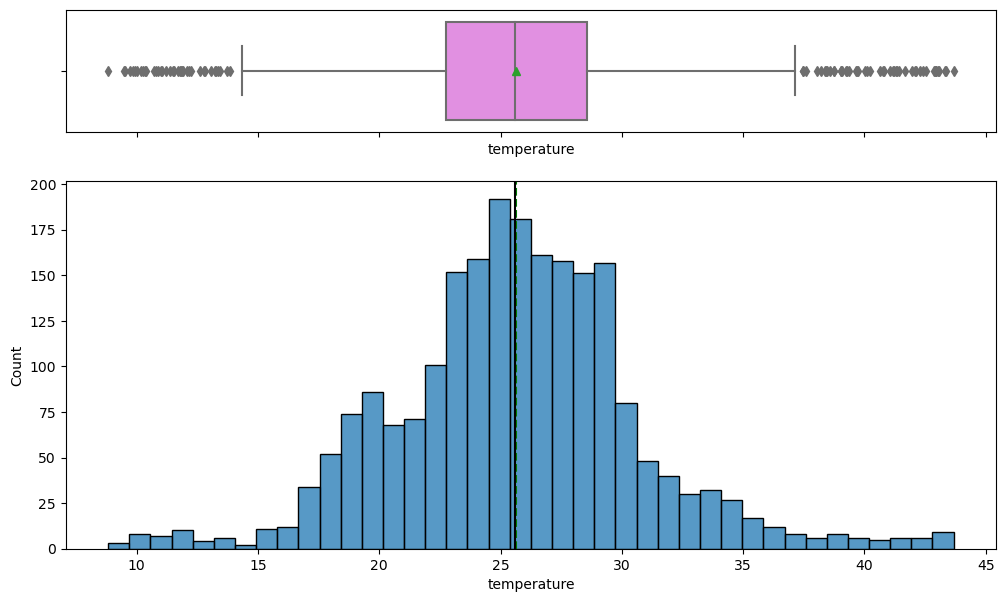

In [62]:
histogram_boxplot(df, "temperature")

### Humidity

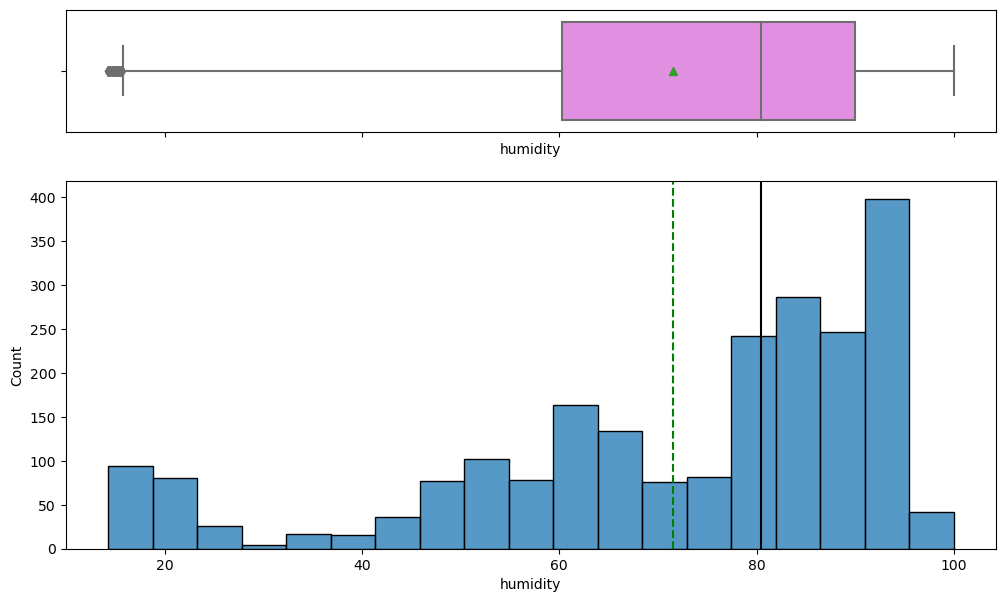

In [63]:
histogram_boxplot(df, "humidity")

### pH

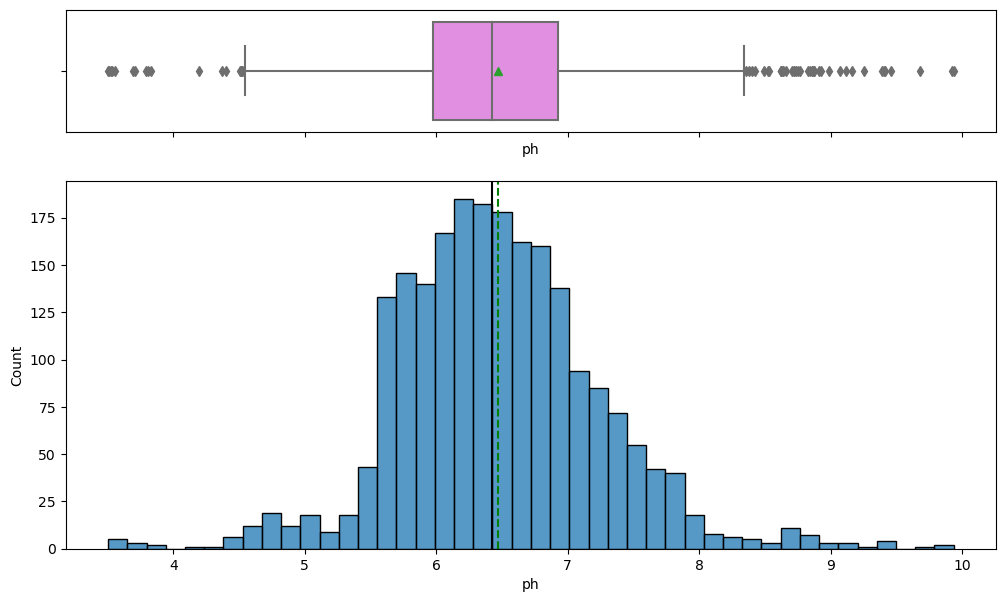

In [64]:
histogram_boxplot(df, "ph")

### Rainfall

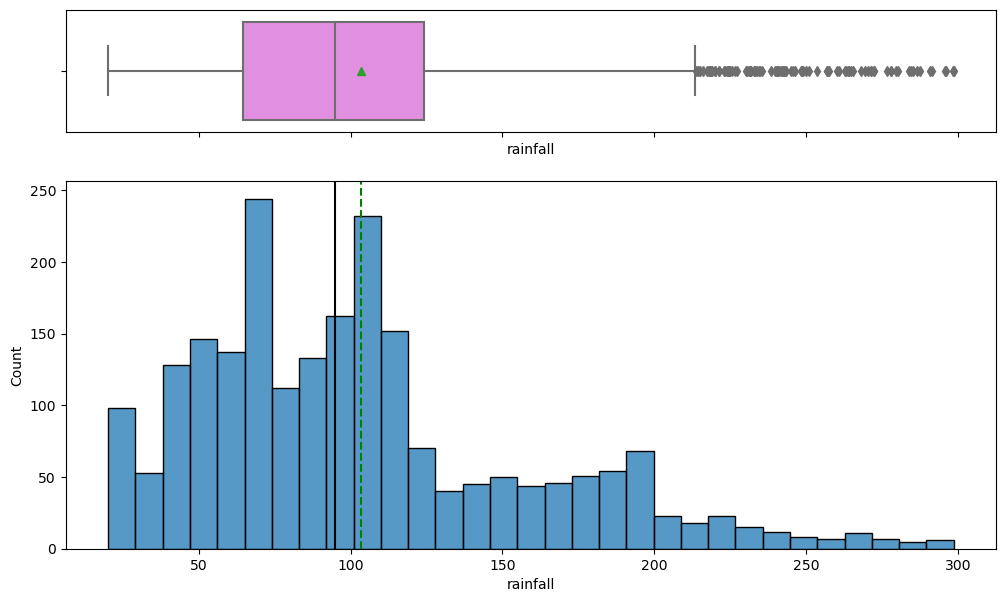

In [65]:
histogram_boxplot(df, "rainfall")

### Label

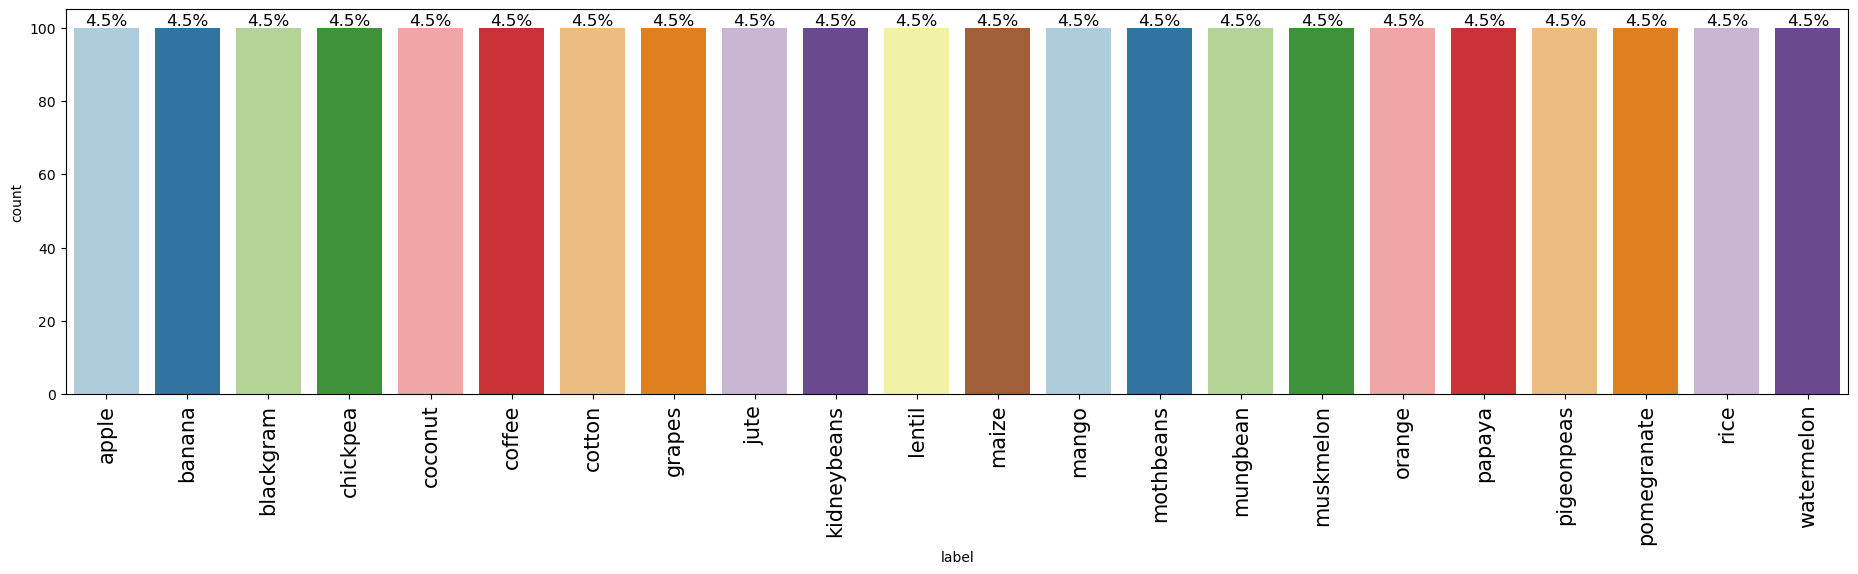

In [66]:
labeled_barplot(df, "label", perc=True)

## Bivariate Analysis

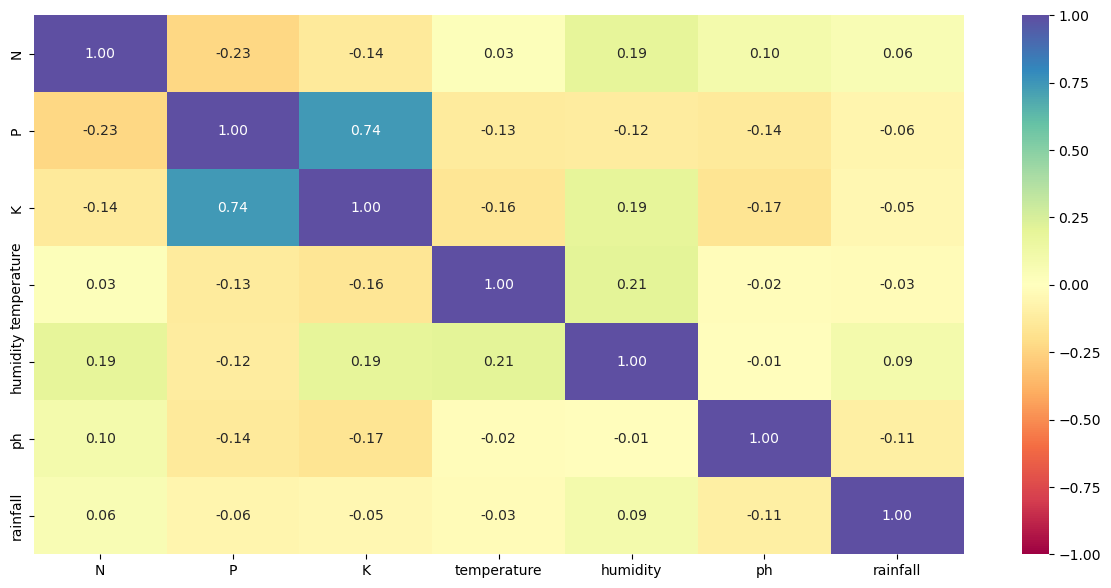

In [67]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Potassium and Phosphorus have the relatively highest correlation of 0.74

* We will be checking how the other features relate with the label column

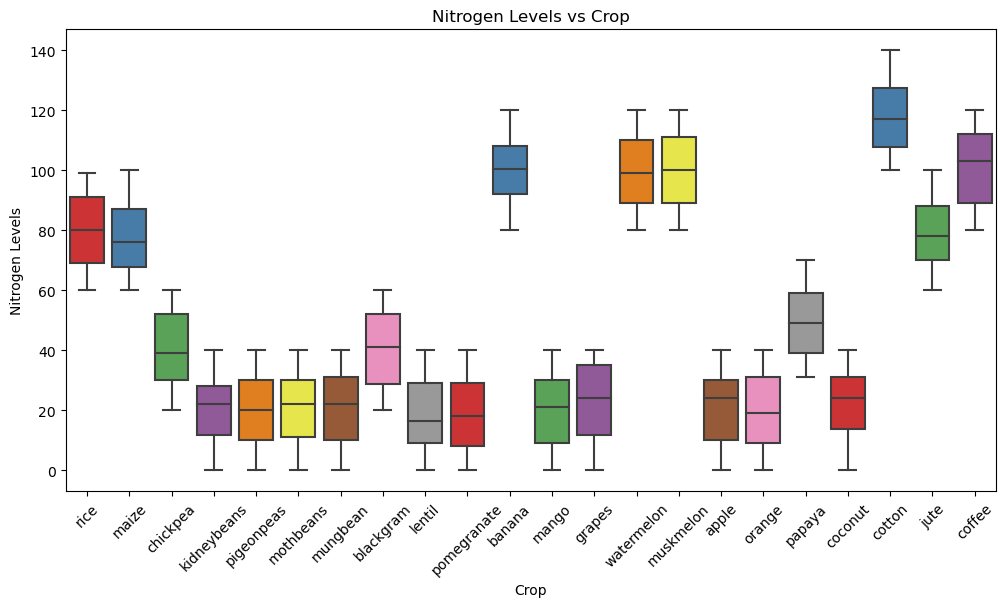

In [68]:

# Nitrogen vs Crop
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='N', data=data, palette='Set1')
plt.title('Nitrogen Levels vs Crop')
plt.xlabel('Crop')
plt.ylabel('Nitrogen Levels')
plt.xticks(rotation=45)
plt.show()


* Most crops do not rquire a lot of nitrogen
* rice, maize,banana,,watermelon, muskmelon,cotton, and coffee have high nitrogen requirements

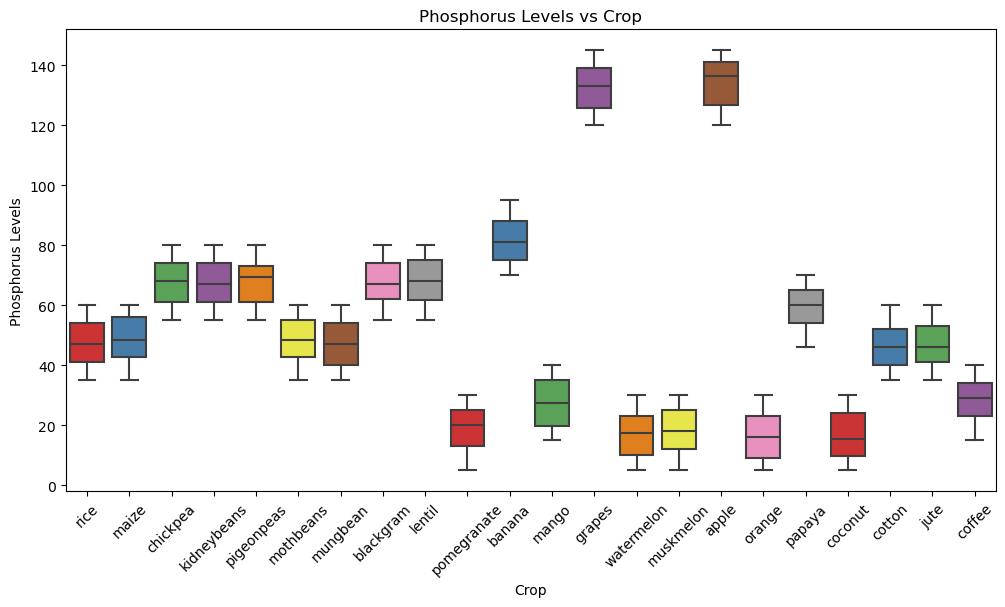

In [69]:
#phosphorus vs crop
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='P', data=data, palette='Set1')
plt.title('Phosphorus Levels vs Crop')
plt.xlabel('Crop')
plt.ylabel('Phosphorus Levels')
plt.xticks(rotation=45)
plt.show()


* grapes and apple require soil rich in phosphorus

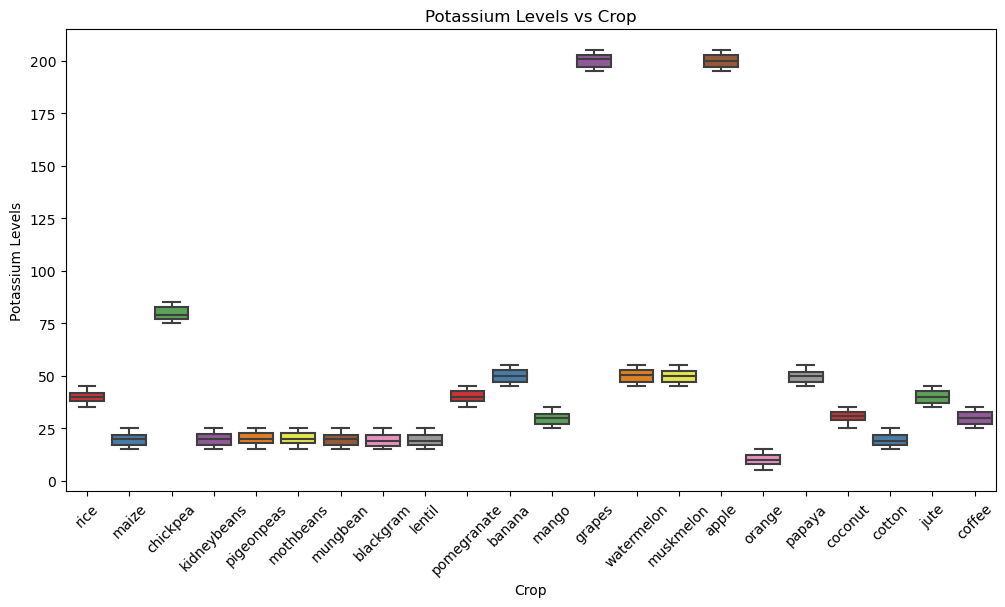

In [70]:
# Potassium vs crop
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='K', data=data, palette='Set1')
plt.title('Potassium Levels vs Crop')
plt.xlabel('Crop')
plt.ylabel('Potassium Levels')
plt.xticks(rotation=45)
plt.show()


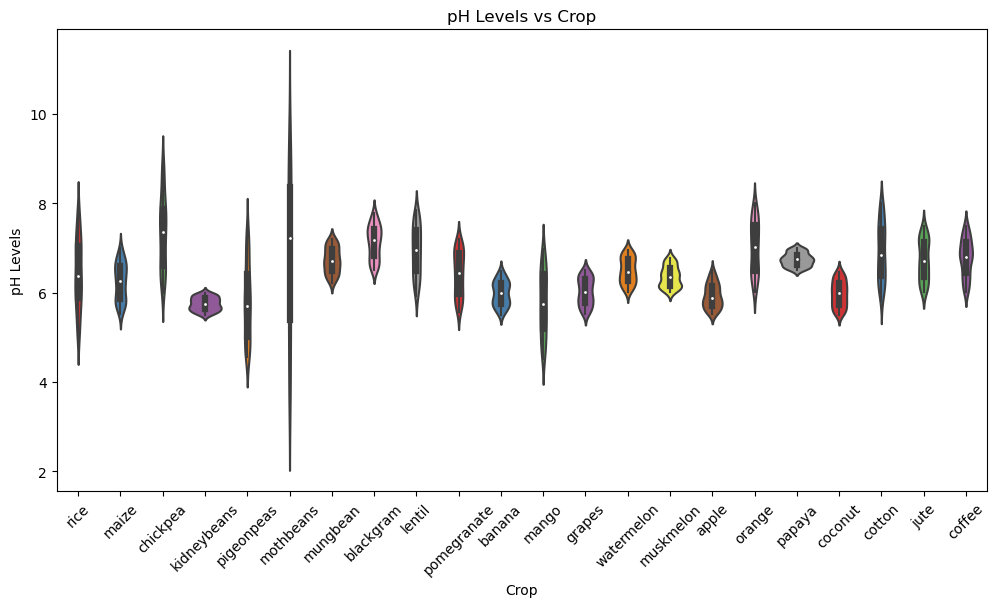

In [71]:

# pH vs Crop
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='ph', data=data, palette='Set1')
plt.title('pH Levels vs Crop')
plt.xlabel('Crop')
plt.ylabel('pH Levels')
plt.xticks(rotation=45)
plt.show()


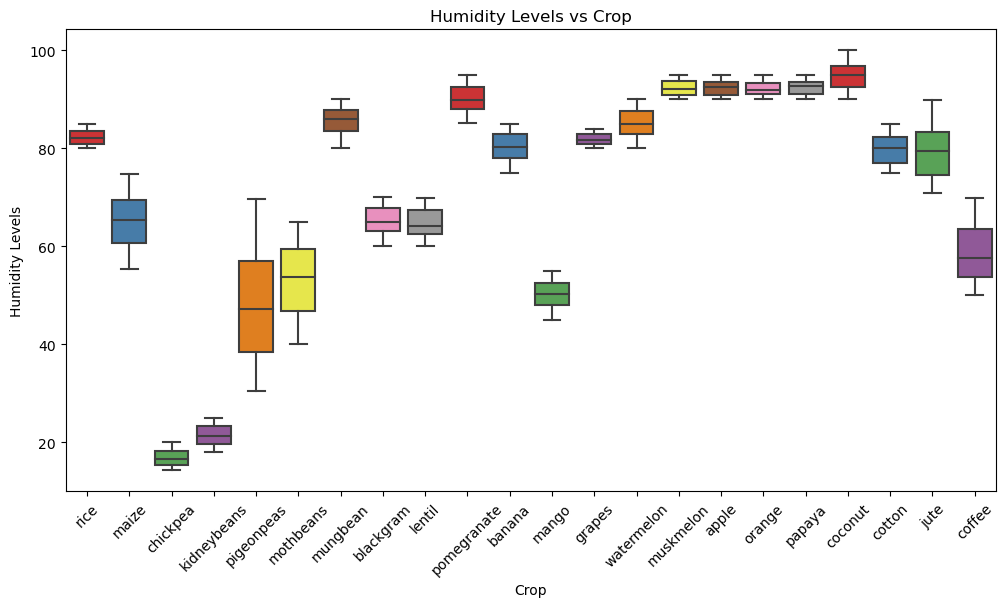

In [72]:
# crop vs humidity
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='humidity', data=data, palette='Set1')
plt.title('Humidity Levels vs Crop')
plt.xlabel('Crop')
plt.ylabel('Humidity Levels')
plt.xticks(rotation=45)
plt.show()


## Data Preparation

In [75]:
# Categorical column preprocessing
le = LabelEncoder()
df.label = le.fit_transform(df.label)

In [79]:
# Rename the 'label' column to 'crop'
df = df.rename(columns={'label': 'crop'})


In [80]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [81]:
# Preparing the data
X = df.drop("crop", axis=1)

Y = df["crop"]


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [82]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (1540, 7)
Shape of test set :  (660, 7)
Percentage of classes in training set:
17    0.051948
16    0.050000
4     0.048701
20    0.048701
10    0.047403
5     0.046753
11    0.046753
1     0.046753
3     0.046753
18    0.046104
21    0.046104
2     0.046104
19    0.044805
0     0.044805
8     0.044156
12    0.044156
14    0.043506
13    0.043506
9     0.043506
6     0.041558
15    0.041558
7     0.036364
Name: crop, dtype: float64
Percentage of classes in test set:
7     0.066667
15    0.054545
6     0.054545
14    0.050000
13    0.050000
9     0.050000
12    0.048485
8     0.048485
19    0.046970
0     0.046970
21    0.043939
18    0.043939
2     0.043939
3     0.042424
11    0.042424
5     0.042424
1     0.042424
10    0.040909
4     0.037879
20    0.037879
16    0.034848
17    0.030303
Name: crop, dtype: float64


## Logistic Regression

In [85]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [92]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 98.33%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        28
           6       0.97      1.00      0.99        36
           7       1.00      1.00      1.00        44
           8       0.91      0.94      0.92        32
           9       0.97      0.94      0.95        33
          10       1.00      1.00      1.00        27
          11       1.00      0.96      0.98        28
          12       1.00      1.00      1.00        32
          13       0.94      1.00      0.97        33
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        36
          16       1.00      1.00      1

In [98]:
from sklearn.model_selection import cross_val_score

#Cross validation score
scores = cross_val_score(lg, X, Y, cv=5, scoring='accuracy') 

print("Cross-validated Accuracy:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())


Cross-validated Accuracy: [0.97727273 0.98863636 0.98409091 0.98409091 0.97954545]
Mean Accuracy: 0.9827272727272728
Standard Deviation of Accuracy: 0.003962635403218805


In [100]:
# Save the logistic regression model to a file using pickle
lg_model_path = 'logistic_regression_model.pkl'
with open(lg_model_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Logistic Regression model saved to {lg_model_path}")


Logistic Regression model saved to logistic_regression_model.pkl


## Decision Tree

In [101]:
DT = DecisionTreeClassifier(criterion="gini", random_state=1)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [102]:
# Visualizing the tree
feature_names = list(X_train.columns)
print(feature_names)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


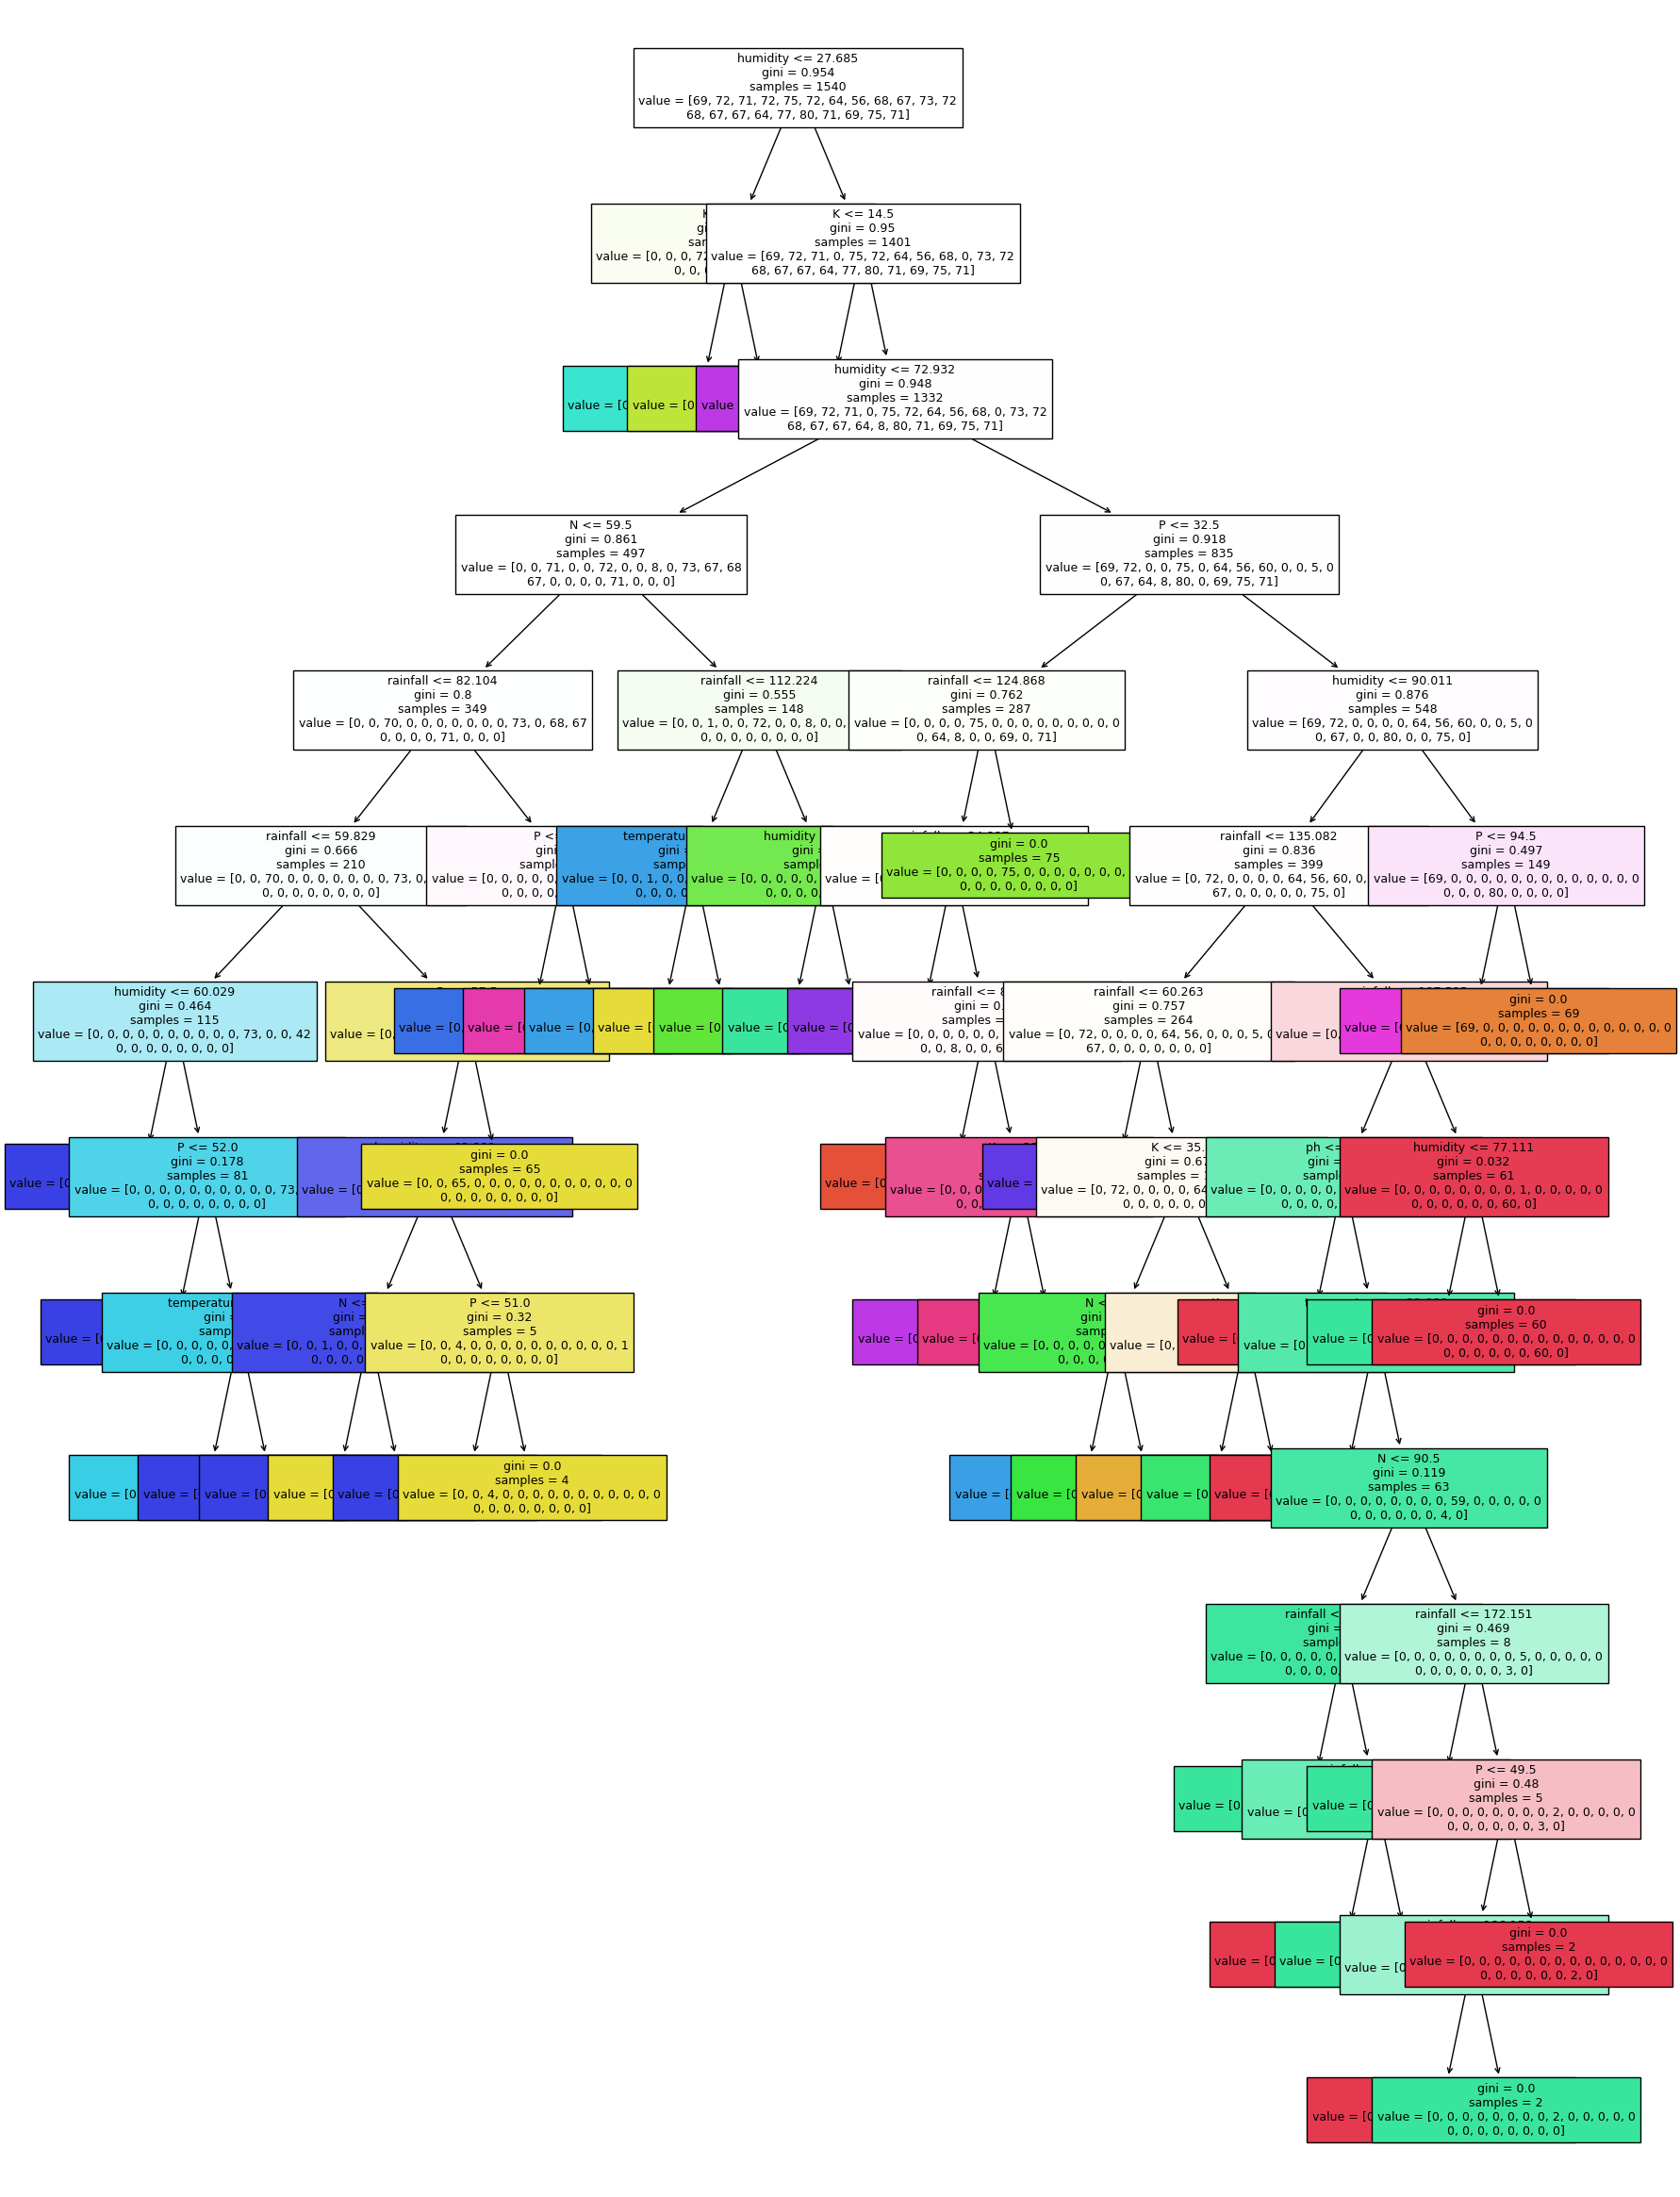

In [104]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    DT,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [105]:
# Text report showing the rules of a decision tree -

print(tree.export_text(DT, feature_names=feature_names, show_weights=True))

|--- humidity <= 27.68
|   |--- K <= 50.00
|   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 67.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: 9
|   |--- K >  50.00
|   |   |--- weights: [0.00, 0.00, 0.00, 72.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: 3
|--- humidity >  27.68
|   |--- K <= 14.50
|   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 69.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: 16
|   |--- K >  14.50
|   |   |--- humidity <= 72.93
|   |   |   |--- N <= 59.50
|   |   |   |   |--- rainfall <= 82.10
|   |   |   |   |   |--- rainfall <= 59.83
|   |   |   |   |   |   |--- humidity <= 60.03
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 34.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: 13
|   

In [106]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        DT.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                  Imp
rainfall     0.386562
K            0.188184
humidity     0.183395
P            0.173768
N            0.054231
temperature  0.007172
ph           0.006688


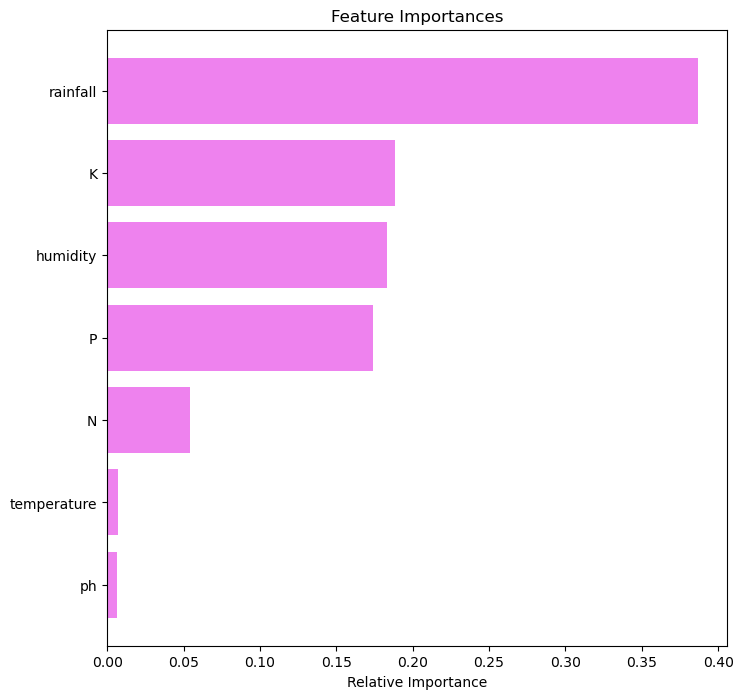

In [107]:
importances = DT.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [108]:
y_pred = DT.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 99.24%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.98        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        44
           8       0.97      0.91      0.94        32
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        32
          13       1.00      0.97      0.98        33
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        36
          16       1.00      1.00      1

In [109]:
#Cross validation score
scores = cross_val_score(DT, X, Y, cv=5, scoring='accuracy') 

print("Cross-validated Accuracy:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Cross-validated Accuracy: [0.99090909 0.98409091 0.98863636 0.99090909 0.98181818]
Mean Accuracy: 0.9872727272727273
Standard Deviation of Accuracy: 0.003692744729379999


In [110]:
# Save the Decision Tree model to a file using pickle
dt_model_path = 'decision_tree_model.pkl'
with open(dt_model_path, 'wb') as file:
    pickle.dump(DT, file)

print(f"Decision Tree model saved to {dt_model_path}")

Decision Tree model saved to decision_tree_model.pkl


## Random Forest

In [112]:
RF = RandomForestClassifier(n_estimators=20, random_state=4)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=4)

In [113]:
y_pred = RF.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 99.70%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        44
           8       0.94      1.00      0.97        32
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        33
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        36
          16       1.00      1.00      1

In [114]:
#Cross validation score
scores = cross_val_score(RF, X, Y, cv=5, scoring='accuracy') 

print("Cross-validated Accuracy:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Cross-validated Accuracy: [0.99545455 0.99090909 0.99545455 0.99772727 0.98636364]
Mean Accuracy: 0.9931818181818182
Standard Deviation of Accuracy: 0.004065578140908709


In [115]:
# Save the Random Forest model to a file using pickle
rf_model_path = 'random_forest_model.pkl'
with open(rf_model_path, 'wb') as file:
    pickle.dump(RF, file)

print(f"Random Forest model saved to {rf_model_path}")

Random Forest model saved to random_forest_model.pkl


## Support Vector Machine (SVM)

In [117]:
# Creating and training the SVM model
svm_model = SVC(kernel='rbf', random_state=1)  
svm_model.fit(X_train, y_train)

SVC(random_state=1)

In [118]:
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 98.18%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       0.91      1.00      0.95        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        28
           6       0.97      1.00      0.99        36
           7       1.00      1.00      1.00        44
           8       0.91      1.00      0.96        32
           9       0.92      1.00      0.96        33
          10       0.96      1.00      0.98        27
          11       1.00      0.96      0.98        28
          12       1.00      1.00      1.00        32
          13       1.00      0.91      0.95        33
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        36
          16       1.00      1.00      1

In [119]:
#Cross validation score
scores = cross_val_score(svm_model, X, Y, cv=5, scoring='accuracy') 

print("Cross-validated Accuracy:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Cross-validated Accuracy: [0.98409091 0.97954545 0.97954545 0.97272727 0.975     ]
Mean Accuracy: 0.9781818181818182
Standard Deviation of Accuracy: 0.003962635403218789


In [120]:
# Save the SVM model to a file using pickle
svm_model_path = 'svm_model.pkl'
with open(svm_model_path, 'wb') as file:
    pickle.dump(svm_model, file)

print(f"SVM model saved to {svm_model_path}")

SVM model saved to svm_model.pkl


In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import pickle

# Assuming 'X_test' and 'y_test' are your test features and target variable
# Load SVM model
with open(svm_model_path, 'rb') as file:
    svm_model = pickle.load(file)

# Load Logistic Regression model
with open(lg_model_path, 'rb') as file:
    logistic_regression_model = pickle.load(file)

# Load Decision Tree model
with open(dt_model_path, 'rb') as file:
    decision_tree_model = pickle.load(file)

# Load Random Forest model
with open(rf_model_path, 'rb') as file:
    random_forest_model = pickle.load(file)

# Make predictions
svm_predictions = svm_model.predict(X_test)
logistic_regression_predictions = logistic_regression_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate performance
models_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Function to calculate and append metrics to the dataframe
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    models_performance.loc[len(models_performance)] = [name, acc, prec, rec, f1]

# Evaluate each model
evaluate_model('SVM', y_test, svm_predictions)
evaluate_model('Logistic Regression', y_test, logistic_regression_predictions)
evaluate_model('Decision Tree', y_test, decision_tree_predictions)
evaluate_model('Random Forest', y_test, random_forest_predictions)

# Display the performance comparison
print(models_performance)


                 Model  Accuracy  Precision    Recall        F1
0                  SVM  0.981818   0.982976  0.981818  0.981663
1  Logistic Regression  0.983333   0.983558  0.983333  0.983326
2        Decision Tree  0.992424   0.992710  0.992424  0.992444
3        Random Forest  0.996970   0.997148  0.996970  0.996952


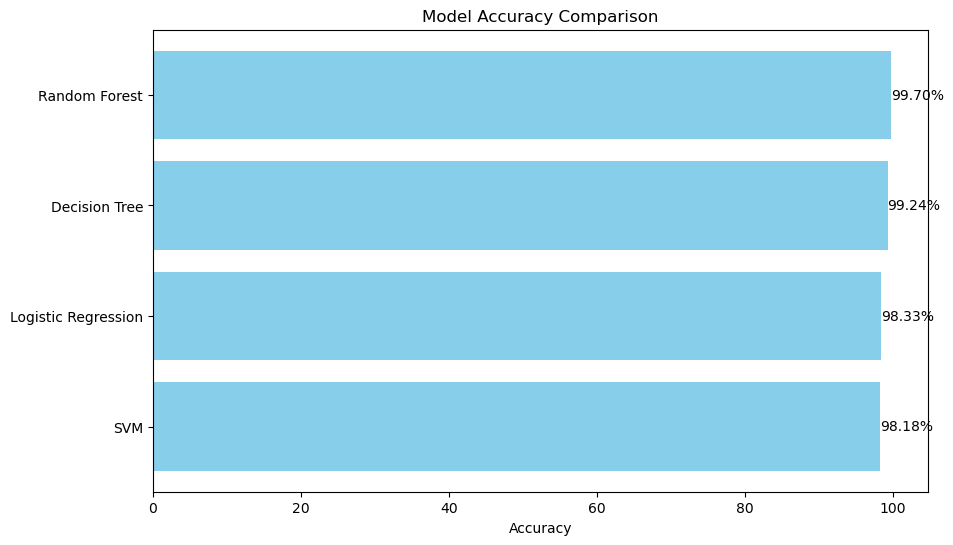

In [125]:
fig, ax = plt.subplots(figsize=(10, 6))

# Sorting by accuracy for better visualization
sorted_models = models_performance.sort_values(by='Accuracy', ascending=True)

# Plotting only Accuracy
ax.barh(sorted_models['Model'], sorted_models['Accuracy'] * 100, color='skyblue')

# Adding percentage labels
for index, value in enumerate(sorted_models['Accuracy']):
    ax.text(value * 100, index, f'{value:.2%}', va='center', fontsize=10)

ax.set_xlabel('Accuracy')
ax.set_title('Model Accuracy Comparison')

# Display the plot
plt.show()
